In [13]:
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
# Load the Parquet file
df = pq.read_table('data/healthcare-access/41100081-eng/healthcare_access.parquet').to_pandas()

In [15]:
# display df
df.head()

,indigenous_group,gender,healthcare_access_experience,value,unmet_healthcare_need_past_12mo,consulted_provider_nonurgent_12mo,wait_time,wait_satisfaction,mental_health_status,needed_mental_health_care,mental_healthcare_needs_met,prescription_12mo,cost_related_nonadherence,unable_to_fill_prescription,traveled_for_care,reported_discrimination,importance_indigenous_support,reason_indigenous_support
0,First Nations,"Total, gender","Total, unmet health care needs in the past 12 ...",100.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,First Nations,Men+,"Total, unmet health care needs in the past 12 ...",100.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,First Nations,Women+,"Total, unmet health care needs in the past 12 ...",100.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,Métis,"Total, gender","Total, unmet health care needs in the past 12 ...",100.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,Métis,Men+,"Total, unmet health care needs in the past 12 ...",100.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None


# Unmet Healthcare Needs

In [16]:
df[df['unmet_healthcare_need_past_12mo'] == 'Yes']

,indigenous_group,gender,healthcare_access_experience,value,unmet_healthcare_need_past_12mo,consulted_provider_nonurgent_12mo,wait_time,wait_satisfaction,mental_health_status,needed_mental_health_care,mental_healthcare_needs_met,prescription_12mo,cost_related_nonadherence,unable_to_fill_prescription,traveled_for_care,reported_discrimination,importance_indigenous_support,reason_indigenous_support
9,First Nations,"Total, gender","Yes, had an unmet health care need in the past...",32.4,Yes,None,None,None,None,None,None,None,None,None,None,None,None,None
10,First Nations,Men+,"Yes, had an unmet health care need in the past...",24.4,Yes,None,None,None,None,None,None,None,None,None,None,None,None,None
11,First Nations,Women+,"Yes, had an unmet health care need in the past...",38.6,Yes,None,None,None,None,None,None,None,None,None,None,None,None,None
12,Métis,"Total, gender","Yes, had an unmet health care need in the past...",29.9,Yes,None,None,None,None,None,None,None,None,None,None,None,None,None
13,Métis,Men+,"Yes, had an unmet health care need in the past...",25.5,Yes,None,None,None,None,None,None,None,None,None,None,None,None,None
14,Métis,Women+,"Yes, had an unmet health care need in the past...",33.9,Yes,None,None,None,None,None,None,None,None,None,None,None,None,None
15,Inuk (Inuit),"Total, gender","Yes, had an unmet health care need in the past...",28.5,Yes,None,None,None,None,None,None,None,None,None,None,None,None,None
16,Inuk (Inuit),Men+,"Yes, had an unmet health care need in the past...",25.7,Yes,None,None,None,None,None,None,None,None,None,None,None,None,None
17,Inuk (Inuit),Women+,"Yes, had an unmet health care need in the past...",30.9,Yes,None,None,None,None,None,None,None,None,None,None,None,None,None


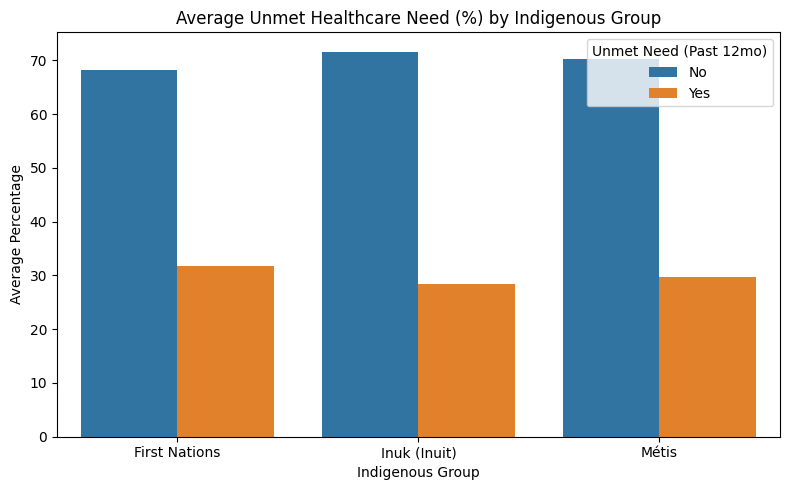

In [17]:
# Filter rows where 'unmet_healthcare_need_past_12mo' is not null and group by indigenous_group and Yes/No
unmet_avg = (
    df[df['unmet_healthcare_need_past_12mo'].notna()]
    .groupby(['indigenous_group', 'unmet_healthcare_need_past_12mo'])['value']
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,5))
sns.barplot(data=unmet_avg, x='indigenous_group', y='value', hue='unmet_healthcare_need_past_12mo')
plt.title('Average Unmet Healthcare Need (%) by Indigenous Group')
plt.ylabel('Average Percentage')
plt.xlabel('Indigenous Group')
plt.legend(title='Unmet Need (Past 12mo)')
plt.tight_layout()
plt.show()

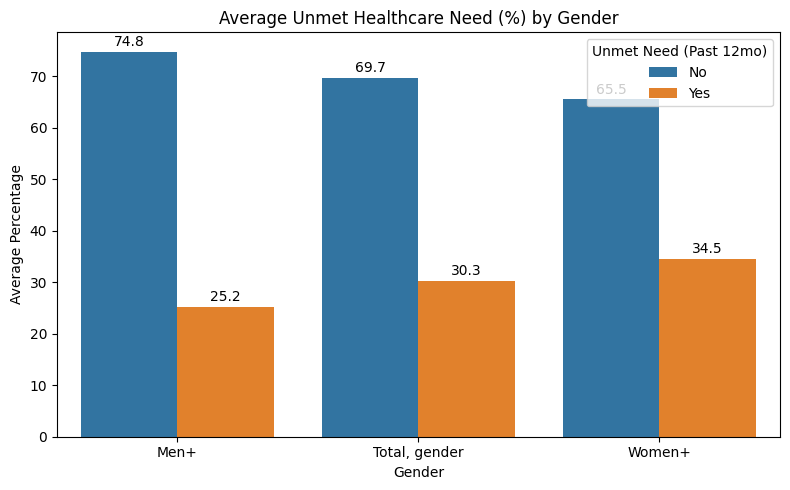

In [30]:
# Filter rows where 'unmet_healthcare_need_past_12mo' is not null and group by indigenous_group and Yes/No
unmet_avg = (
    df[df['unmet_healthcare_need_past_12mo'].notna()]
    .groupby(['gender', 'unmet_healthcare_need_past_12mo'])['value']
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,5))
ax = sns.barplot(data=unmet_avg, x='gender', y='value', hue='unmet_healthcare_need_past_12mo')
plt.title('Average Unmet Healthcare Need (%) by Gender')
plt.ylabel('Average Percentage')
plt.xlabel('Gender')
plt.legend(title='Unmet Need (Past 12mo)')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', padding=2)

plt.tight_layout()
plt.show()

The rate of unmet healthcare need is higher for women (34.5%) than for men (25.2%) by 9.3%, but in both groups, the ‘No unmet need’ rate remains higher than ‘Yes’.

# Consulted Provider for Non-Urgent Care

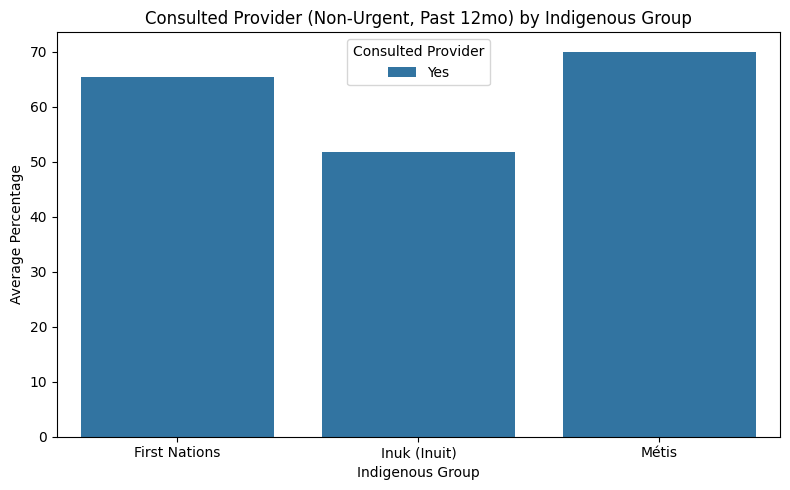

In [26]:
# Plot mean value by group and response (Yes/No)
provider_plot = (
    df[df['consulted_provider_nonurgent_12mo'].notna()]
    .groupby(['indigenous_group', 'consulted_provider_nonurgent_12mo'])['value']
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,5))
sns.barplot(data=provider_plot, x='indigenous_group', y='value', hue='consulted_provider_nonurgent_12mo')
plt.title('Consulted Provider (Non-Urgent, Past 12mo) by Indigenous Group')
plt.ylabel('Average Percentage')
plt.xlabel('Indigenous Group')
plt.legend(title='Consulted Provider')
plt.tight_layout()
plt.show()


# Mental Healthcare Needs Met

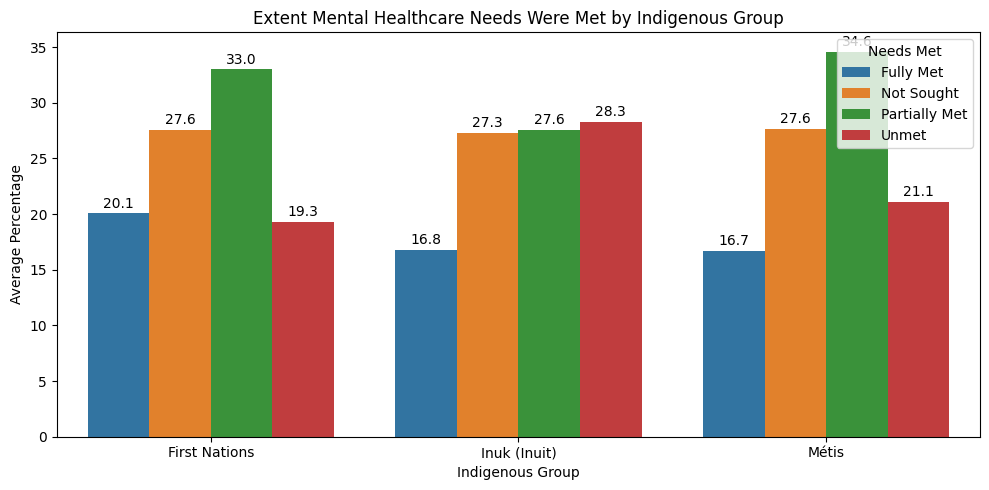

In [31]:
# Plot mean value by group and needs met category
mental_needs_plot = (
    df[df['mental_healthcare_needs_met'].notna()]
    .groupby(['indigenous_group', 'mental_healthcare_needs_met'])['value']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,5))
ax = sns.barplot(data=mental_needs_plot, x='indigenous_group', y='value', hue='mental_healthcare_needs_met')
plt.title('Extent Mental Healthcare Needs Were Met by Indigenous Group')
plt.ylabel('Average Percentage')
plt.xlabel('Indigenous Group')
plt.legend(title='Needs Met')

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', padding=2)

plt.tight_layout()
plt.show()

* For Inuk, the unmet mental healthcare need rate is the highest among all categories

* Unmet mental healthcare need is especially high among the Inuk population, which has the highest unmet rate overall.

* For Métis, the proportion with unmet needs is higher than those whose needs were fully met, but lower than those whose needs were only partially met.

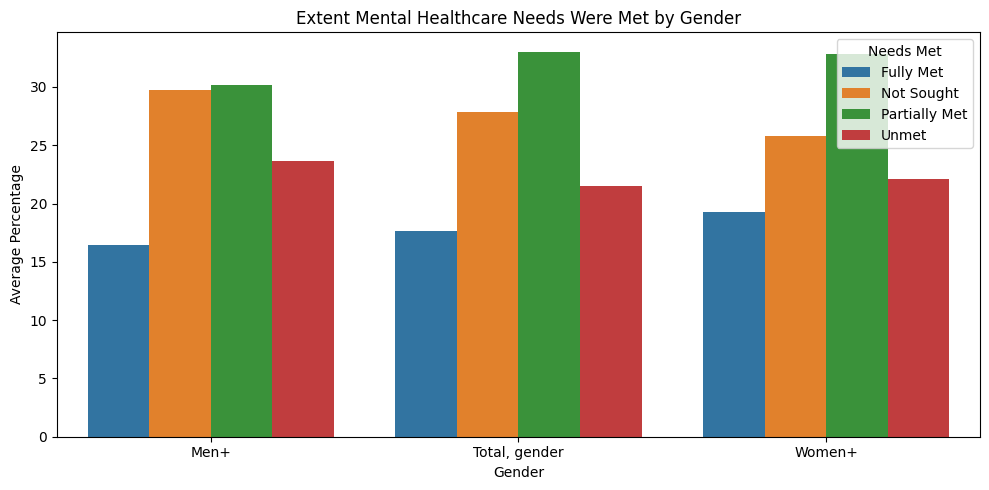

In [32]:
# Plot mean value by group and needs met category
mental_needs_plot = (
    df[df['mental_healthcare_needs_met'].notna()]
    .groupby(['gender', 'mental_healthcare_needs_met'])['value']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,5))
sns.barplot(data=mental_needs_plot, x='gender', y='value', hue='mental_healthcare_needs_met')
plt.title('Extent Mental Healthcare Needs Were Met by Gender')
plt.ylabel('Average Percentage')
plt.xlabel('Gender')
plt.legend(title='Needs Met')
plt.tight_layout()
plt.show()

# Mental Health Status

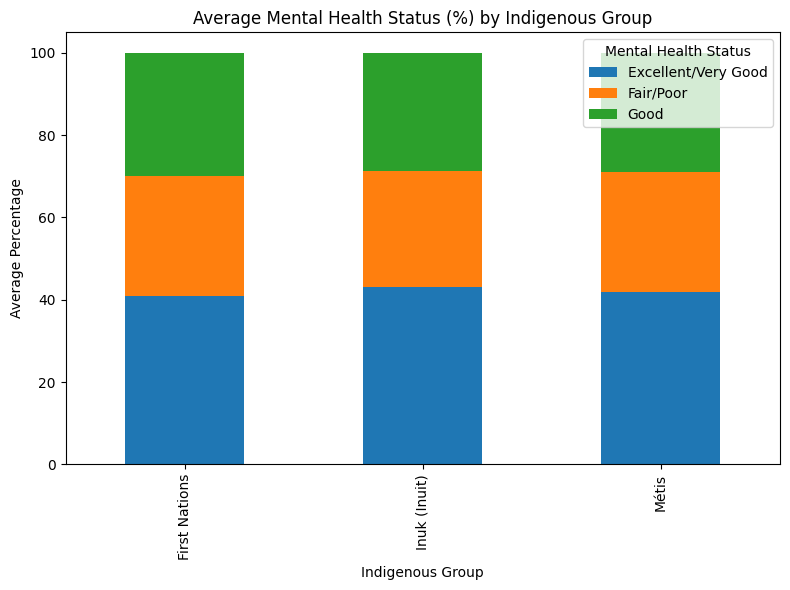

In [18]:
mental_avg = (
    df[df['mental_health_status'].notna()]
    .groupby(['indigenous_group', 'mental_health_status'])['value']
    .mean()
    .unstack(fill_value=0)
)

mental_avg.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('Average Mental Health Status (%) by Indigenous Group')
plt.ylabel('Average Percentage')
plt.xlabel('Indigenous Group')
plt.legend(title='Mental Health Status')
plt.tight_layout()
plt.show()

# Discrimination

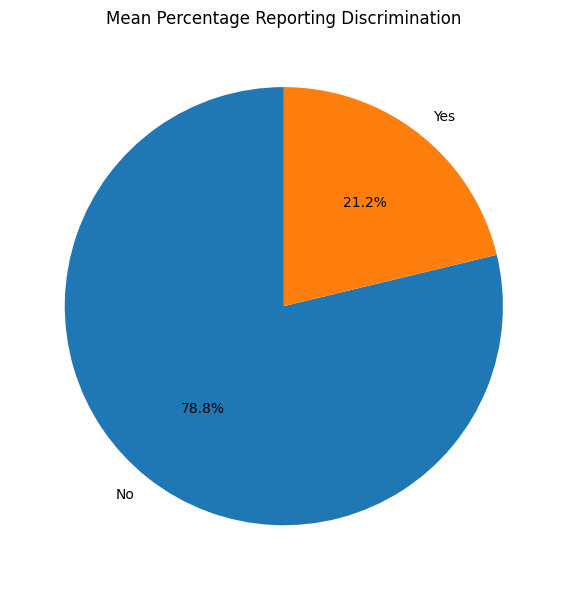

In [19]:
discrim_avg = (
    df[df['reported_discrimination'].notna()]
    .groupby('reported_discrimination')['value']
    .mean()
)

discrim_avg.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6,6))
plt.title('Mean Percentage Reporting Discrimination')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Wait Time

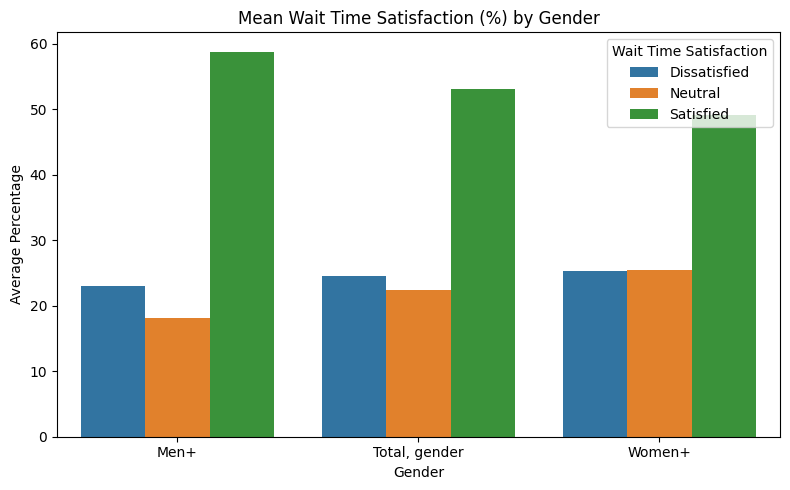

In [20]:
waitsat_avg = (
    df[df['wait_satisfaction'].notna()]
    .groupby(['gender', 'wait_satisfaction'])['value']
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,5))
sns.barplot(data=waitsat_avg, x='gender', y='value', hue='wait_satisfaction')
plt.title('Mean Wait Time Satisfaction (%) by Gender')
plt.ylabel('Average Percentage')
plt.xlabel('Gender')
plt.legend(title='Wait Time Satisfaction')
plt.tight_layout()
plt.show()

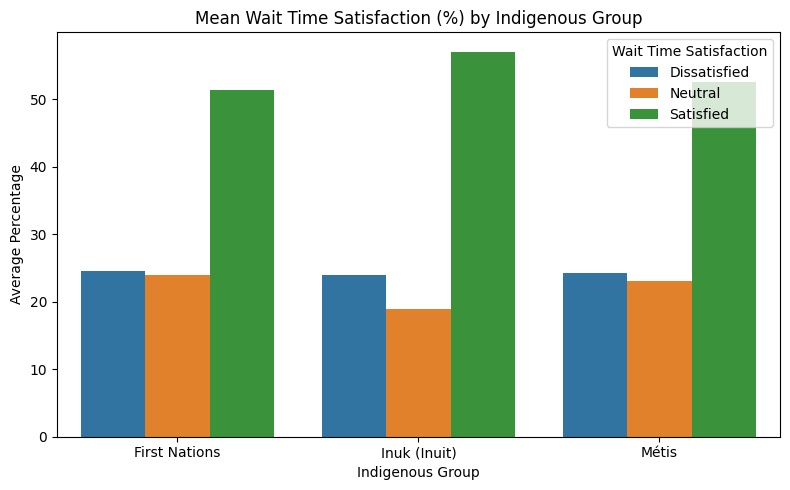

In [25]:
waitsat_avg = (
    df[df['wait_satisfaction'].notna()]
    .groupby(['indigenous_group', 'wait_satisfaction'])['value']
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,5))
sns.barplot(data=waitsat_avg, x='indigenous_group', y='value', hue='wait_satisfaction')
plt.title('Mean Wait Time Satisfaction (%) by Indigenous Group')
plt.ylabel('Average Percentage')
plt.xlabel('Indigenous Group')
plt.legend(title='Wait Time Satisfaction')
plt.tight_layout()
plt.show()

Next Steps:
* Compare to 2017
* Compare with genderal population (non-indigenous)